Experiment with stellargraph

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from node2vec import Node2Vec
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
#import stellargraph as sg

In [2]:
df = pd.read_csv("~/project/GitHub/m154/nbs/data/GiveMeSomeCredit/cs-training.csv")
test_data = pd.read_csv("~/project/GitHub/m154/nbs/data/GiveMeSomeCredit/cs-test.csv")
#print(df)
#print(df.dropna())

# Remove the rows with NA's
#df = df.dropna()
#test_data = test_data.dropna()
# Let's work with 500 rows
#df = df.iloc[0:500, :]
#Graph = sg.StellarGraph(edges = graph_data)
#Graph = sg.StellarGraph.to_networkx(Graph)

features = df.drop(['SeriousDlqin2yrs'], axis=1)
labels = df["SeriousDlqin2yrs"]

In [32]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)

# the model learns that the second feature is double the first
print(np.round(imp.transform(df)))

[[1.00000e+00 1.00000e+00 1.00000e+00 ... 6.00000e+00 0.00000e+00
  2.00000e+00]
 [2.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [3.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [1.49998e+05 0.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [1.49999e+05 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.50000e+05 0.00000e+00 1.00000e+00 ... 2.00000e+00 0.00000e+00
  0.00000e+00]]


<AxesSubplot:xlabel='NumberOfDependents', ylabel='DebtRatio'>

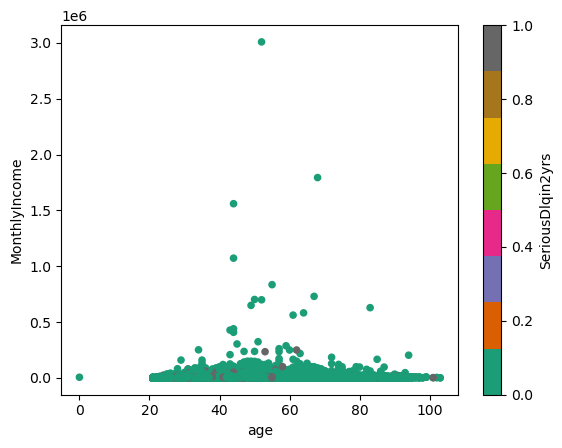

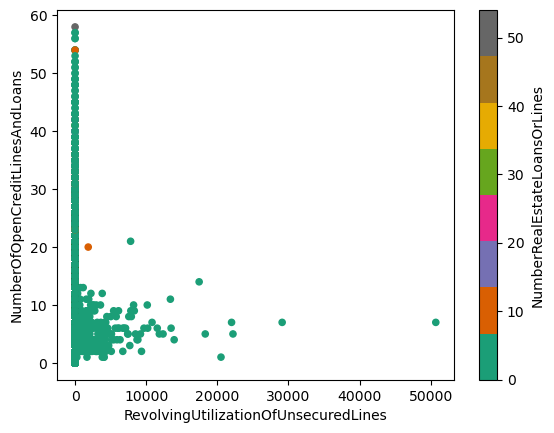

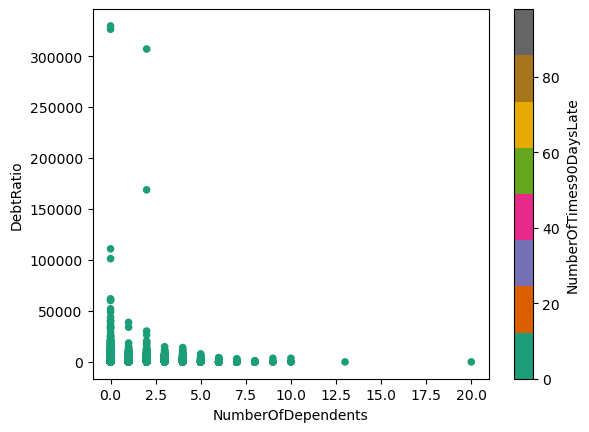

In [28]:
df.plot("age", "MonthlyIncome", kind='scatter', c = "SeriousDlqin2yrs", colormap="Dark2")
df.plot("RevolvingUtilizationOfUnsecuredLines", "NumberOfOpenCreditLinesAndLoans", kind='scatter', c = "NumberRealEstateLoansOrLines", colormap="Dark2")
df.plot("NumberOfDependents", "DebtRatio", kind='scatter', c = "NumberOfTimes90DaysLate", colormap="Dark2")


Use `nx.Graph()` for undirected graph and `nx.DiGraph()` for directed graph. `edge_attr=True` uses the other columns as well.

In [7]:
Graphtype = nx.Graph() 
Graph = nx.from_pandas_edgelist(df,"MonthlyIncome", 'SeriousDlqin2yrs', edge_attr=True, create_using=Graphtype)
pos = nx.spring_layout(Graph, scale=1)
nx.draw(Graph, pos, with_labels=True)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
node2vec_model = Node2Vec(Graph, dimensions=64, walk_length=30, num_walks=200) 
model = node2vec_model.fit(window=10,min_count = 1, batch_words=4)

Computing transition probabilities:   0%|          | 0/336 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████| 200/200 [02:08<00:00,  1.56it/s]


In [ ]:
emb=model.wv[[i for i in model.wv.key_to_index]]
emb.shape
num_nodes = emb.shape[0]

Here I am creating `classes` out of the nodes by looking at `model.wv.index_to_key`. Since `edge_attr=True`, take another look at what values populate `model.wv.index_to_key` and an appropriate banding of classes. Here I thought `model.wv.index_to_key` is populated by `MonthlyIncome` and so I banded it by its quartiles and plotted with PCA and tSNE.

In [ ]:
graph_nodes = [float(i) for i in model.wv.index_to_key]
color_map = []
for node in graph_nodes:
    if node <= 3461:
        color_map.append(0)
    elif node > 3461 and node <= 5250:
        color_map.append(1)
    else: 
        color_map.append(2)   
#nx.draw(Graph, node_color=color_map, with_labels=True)
#plt.show()
def plot_embeddings_PCA(emb, num_nodes, title=""):
    emb_copy = emb.copy()
    if emb_copy.shape[1] > 2:
        pca = PCA(n_components=2)
        emb_copy= pca.fit_transform(emb_copy)
    plt.figure()
    sc = plt.scatter(emb_copy[:,0], emb_copy[:,1], c = graph_nodes, cmap="Dark2")
    plt.legend(handles = sc.legend_elements()[0], title="Clusters", labels=graph_nodes)
    plt.suptitle(title)
    plt.show()
def plot_embeddings_tSNE(emb, num_nodes, title=""):
    emb_copy = emb.copy()
    if emb_copy.shape[1] > 2:
        tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
        emb_copy= tsne.fit_transform(emb_copy)
    plt.figure()
    sc = plt.scatter(emb_copy[:,0], emb_copy[:,1], c = graph_nodes, cmap="Dark2")
    plt.legend(handles = sc.legend_elements()[0], title="Clusters", labels=Counter(graph_nodes).keys())
    plt.suptitle(title)
    plt.show()

In [ ]:
plot_embeddings_PCA(emb, num_nodes)
#plot_embeddings_tSNE(emb, num_nodes)

In [55]:
def plot_embeddings_PCA(emb, title=""):
    emb_copy = emb.copy()
    if emb_copy.shape[1] > 2:
        pca = PCA(n_components=2)
        emb_copy= pca.fit_transform(emb_copy)
    plt.figure()
    sc = plt.scatter(emb_copy[:,0], emb_copy[:,1])#, c = graph_nodes, cmap="Dark2")
    plt.legend(handles = sc.legend_elements()[0], title="Clusters")#, labels=graph_nodes)
    plt.suptitle(title)
    plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
imp_df = np.round(imp.transform(df))
scaler = StandardScaler()
scaler.fit(imp_df)
scaled_data = scaler.transform(imp_df)
pca = PCA(n_components=10) # Can change number of components
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

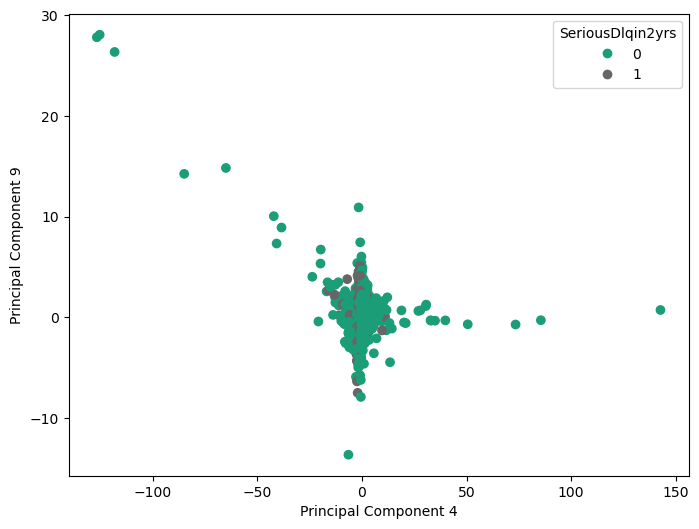

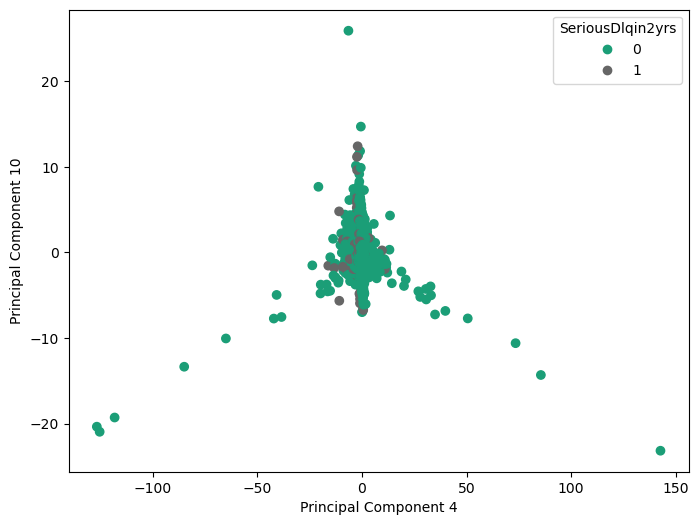

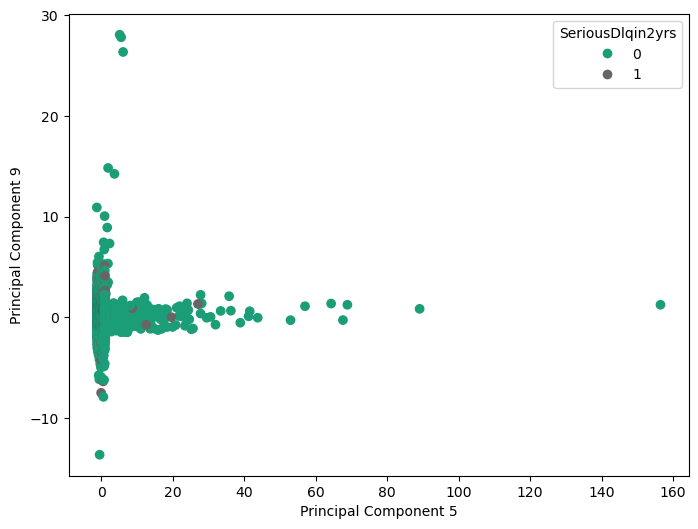

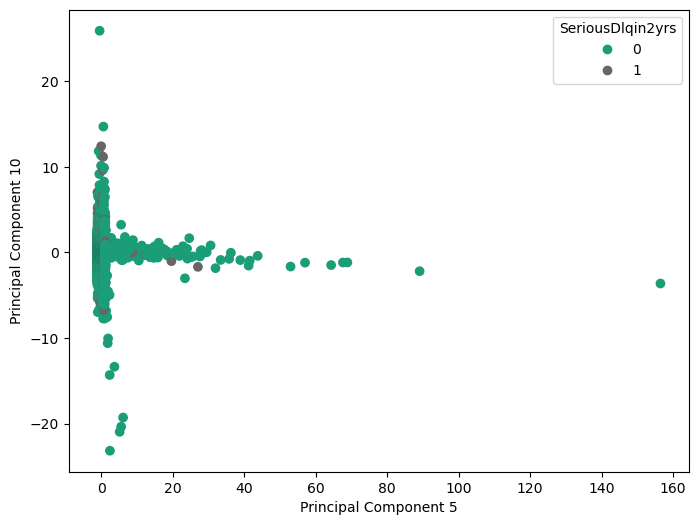

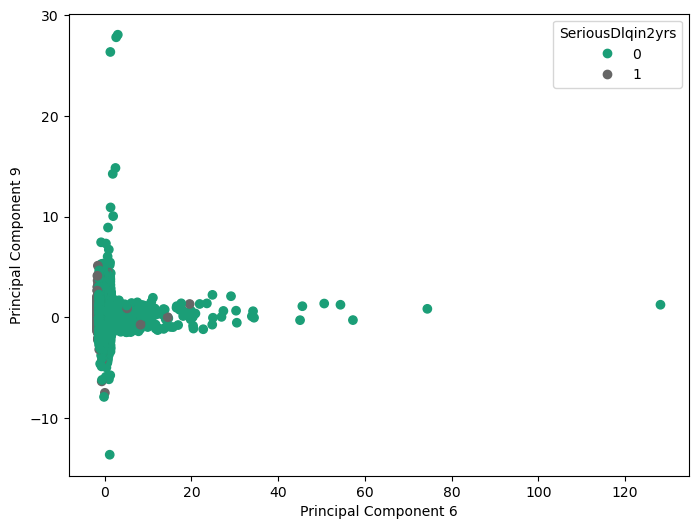

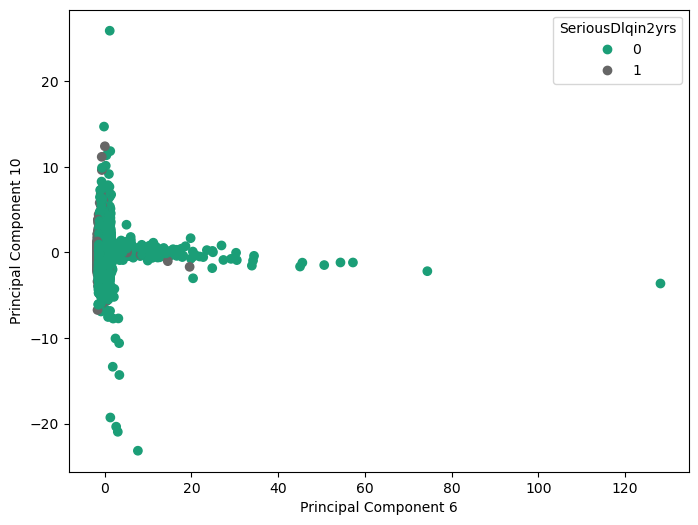

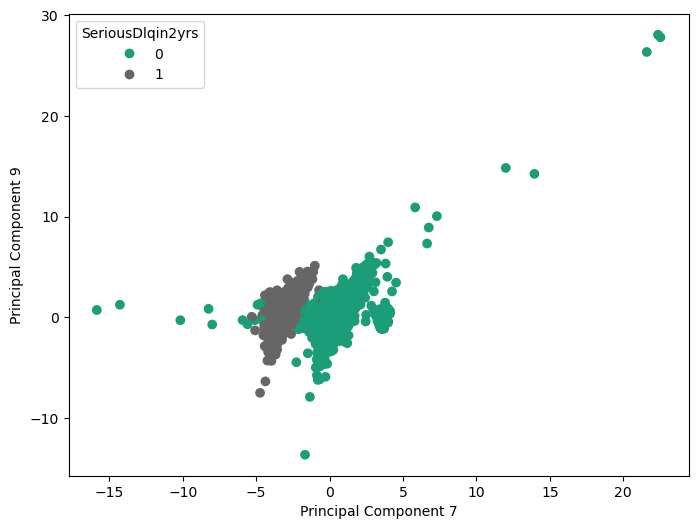

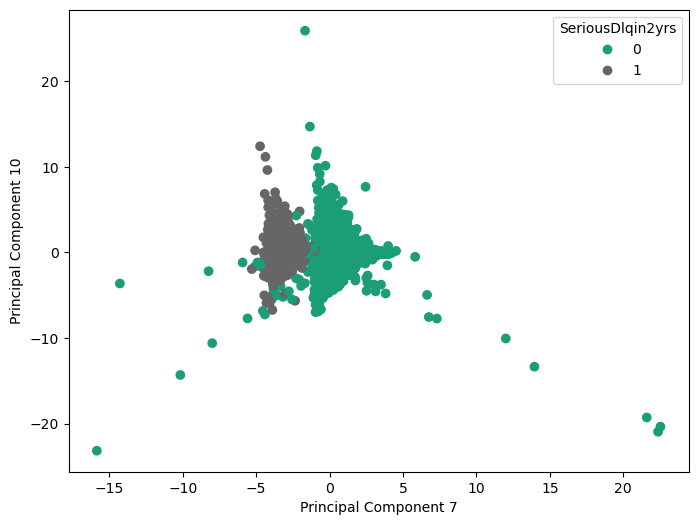

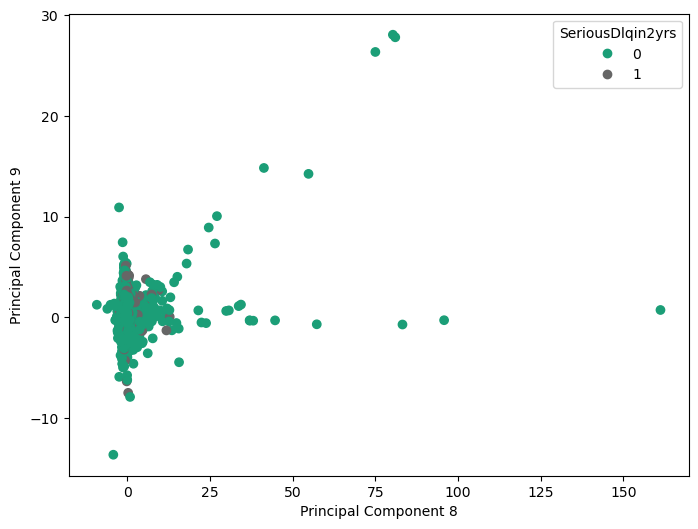

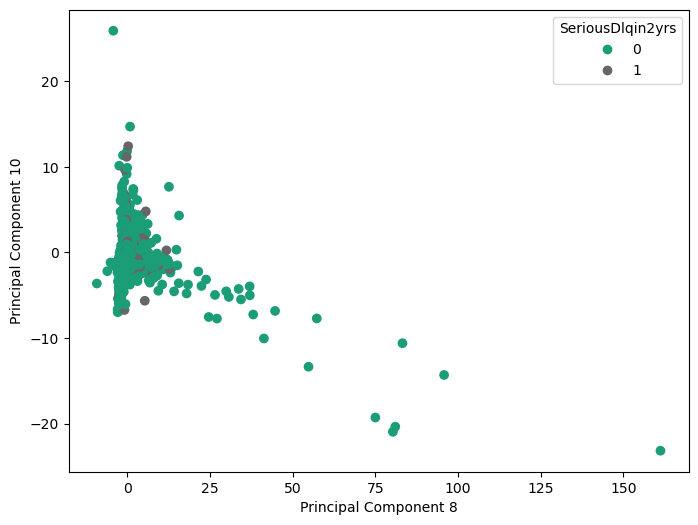

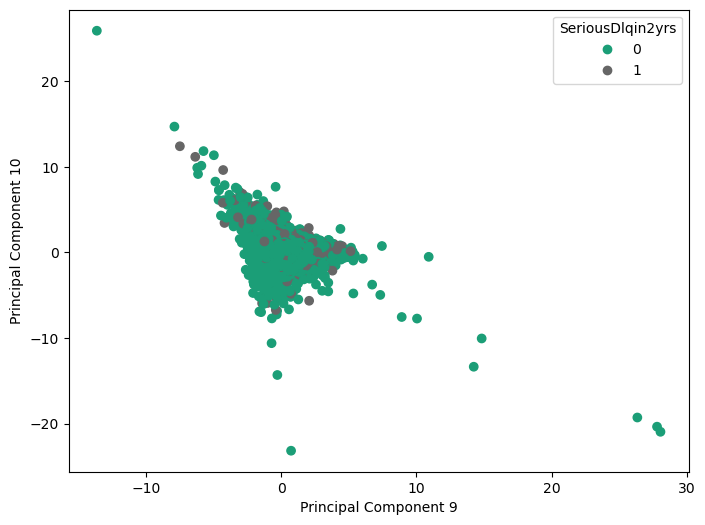

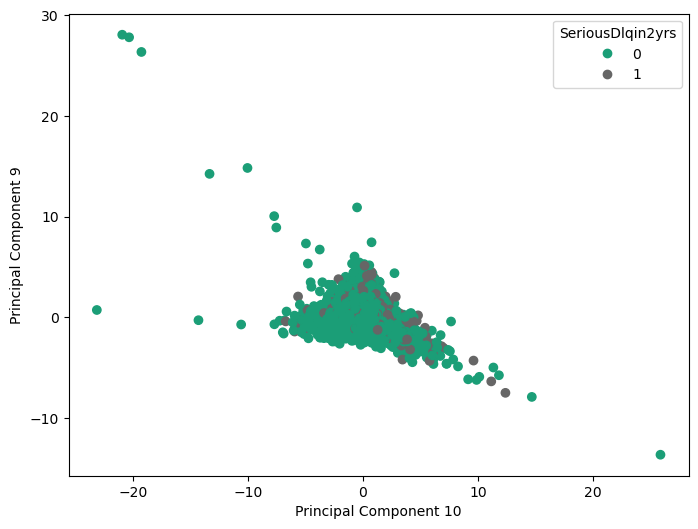

In [5]:
a=0
b=0
for i in range(3, 10):
    a = i
    for j in range(8, 10):
        if i != j:
            b = j
            plt.figure(figsize=(8,6))
            sc = plt.scatter(x_pca[:,a],x_pca[:,b], c=df["SeriousDlqin2yrs"],cmap="Dark2") # Can change coloring
            plt.xlabel(f'Principal Component {str(a+1)}')
            plt.ylabel(f'Principal Component {str(b+1)}')
            plt.legend(*sc.legend_elements(),loc="best", title="SeriousDlqin2yrs")
            plt.savefig(f'PCA_{a}_{b}.png')
#https://datascienceplus.com/principal-component-analysis-pca-with-python/

                                           PC0       PC1       PC2       PC3  \
Unnamed: 0                           -0.001838  0.005848 -0.004801 -0.175857   
SeriousDlqin2yrs                      0.097935 -0.055941  0.324229  0.099542   
RevolvingUtilizationOfUnsecuredLines -0.000679 -0.004756  0.025900 -0.240299   
age                                  -0.053648  0.277257 -0.623424 -0.005886   
NumberOfTime30-59DaysPastDueNotWorse  0.570218  0.066747 -0.025220  0.000236   
DebtRatio                            -0.002463  0.019139  0.023960  0.827392   
MonthlyIncome                        -0.017625  0.288323  0.123899 -0.445511   
NumberOfOpenCreditLinesAndLoans      -0.067808  0.644568 -0.033811  0.103102   
NumberOfTimes90DaysLate               0.572474  0.047699 -0.035170 -0.004772   
NumberRealEstateLoansOrLines         -0.045696  0.631799  0.172618  0.086854   
NumberOfTime60-89DaysPastDueNotWorse  0.572404  0.056802 -0.041915 -0.004874   
NumberOfDependents                    0.

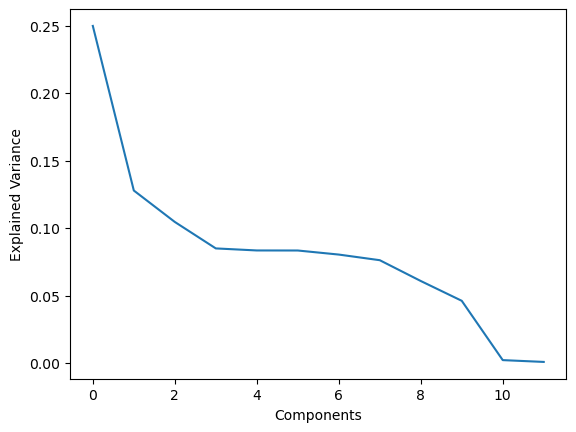

In [59]:
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

Try PCA, 

(projection pursuit; try to find the best projection to find good classification information)
look at different principal components
reduce into different dimensions

Example #4 from package pursuit

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = features
y = labels
lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(X, y).transform(X)
X_r2

array([[ 1.87444073],
       [ 0.091426  ],
       [ 1.79708574],
       ...,
       [ 0.18580293],
       [ 0.33178226],
       [-0.54897016]])

In [25]:
help(model)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  